competition link:

https://www.kaggle.com/competitions/home-data-for-ml-course/data

## Get data and Setup

In [4]:
import pandas as pd
import numpy as np
import matplotlib
from IPython.display import HTML
import base64  
from scipy.stats import skew
from scipy.stats import pearsonr

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# check the datasets
from helper_functions.unzip_file import unzip_file

file_path = 'datas/home-data-for-ml-course.zip'
output_dir = 'datas/house-pricing-dataset'
unzip_file(file_path, output_dir)

Unzip to :
datas/house-pricing-dataset/test.csv.gz
datas/house-pricing-dataset/sample_submission.csv.gz
datas/house-pricing-dataset/test.csv
datas/house-pricing-dataset/data_description.txt
datas/house-pricing-dataset/train.csv
datas/house-pricing-dataset/train.csv.gz
datas/house-pricing-dataset/sample_submission.csv


In [11]:
train = pd.read_csv("datas/house-pricing-dataset/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
test = pd.read_csv("datas/house-pricing-dataset/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
# check the dimension of the data
train.shape, test.shape

((1460, 81), (1459, 80))

In [16]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [17]:
test.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [18]:
np.setxor1d(train.columns.values, test.columns.values)

array(['SalePrice'], dtype=object)

## Feature Selections

## Numerical variables analysis

In [19]:
# Extracting Numerical Columns 
del train["Id"] # "Id" variable is a unique id 
df_num = train.select_dtypes(include = ['int64', 'float64'])
print("----------------------")
print(df_num.columns.values)
print("----------------------")
print(f"The number of Numerical Variables(Excluding the Id Column) are {len(df_num.columns.values)}")
print("----------------------")

----------------------
['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']
----------------------
The number of Numerical Variables(Excluding the Id Column) are 37
----------------------


## Histograms

array([[<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageCars'}>],
       [<Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'EnclosedPorch'}>,
        <Axes: title={'center': '3SsnPorch'}>,
        <Axes: title={'center': 'ScreenPorch'}>],
       [<Axes: title={'center': 'MoSold'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

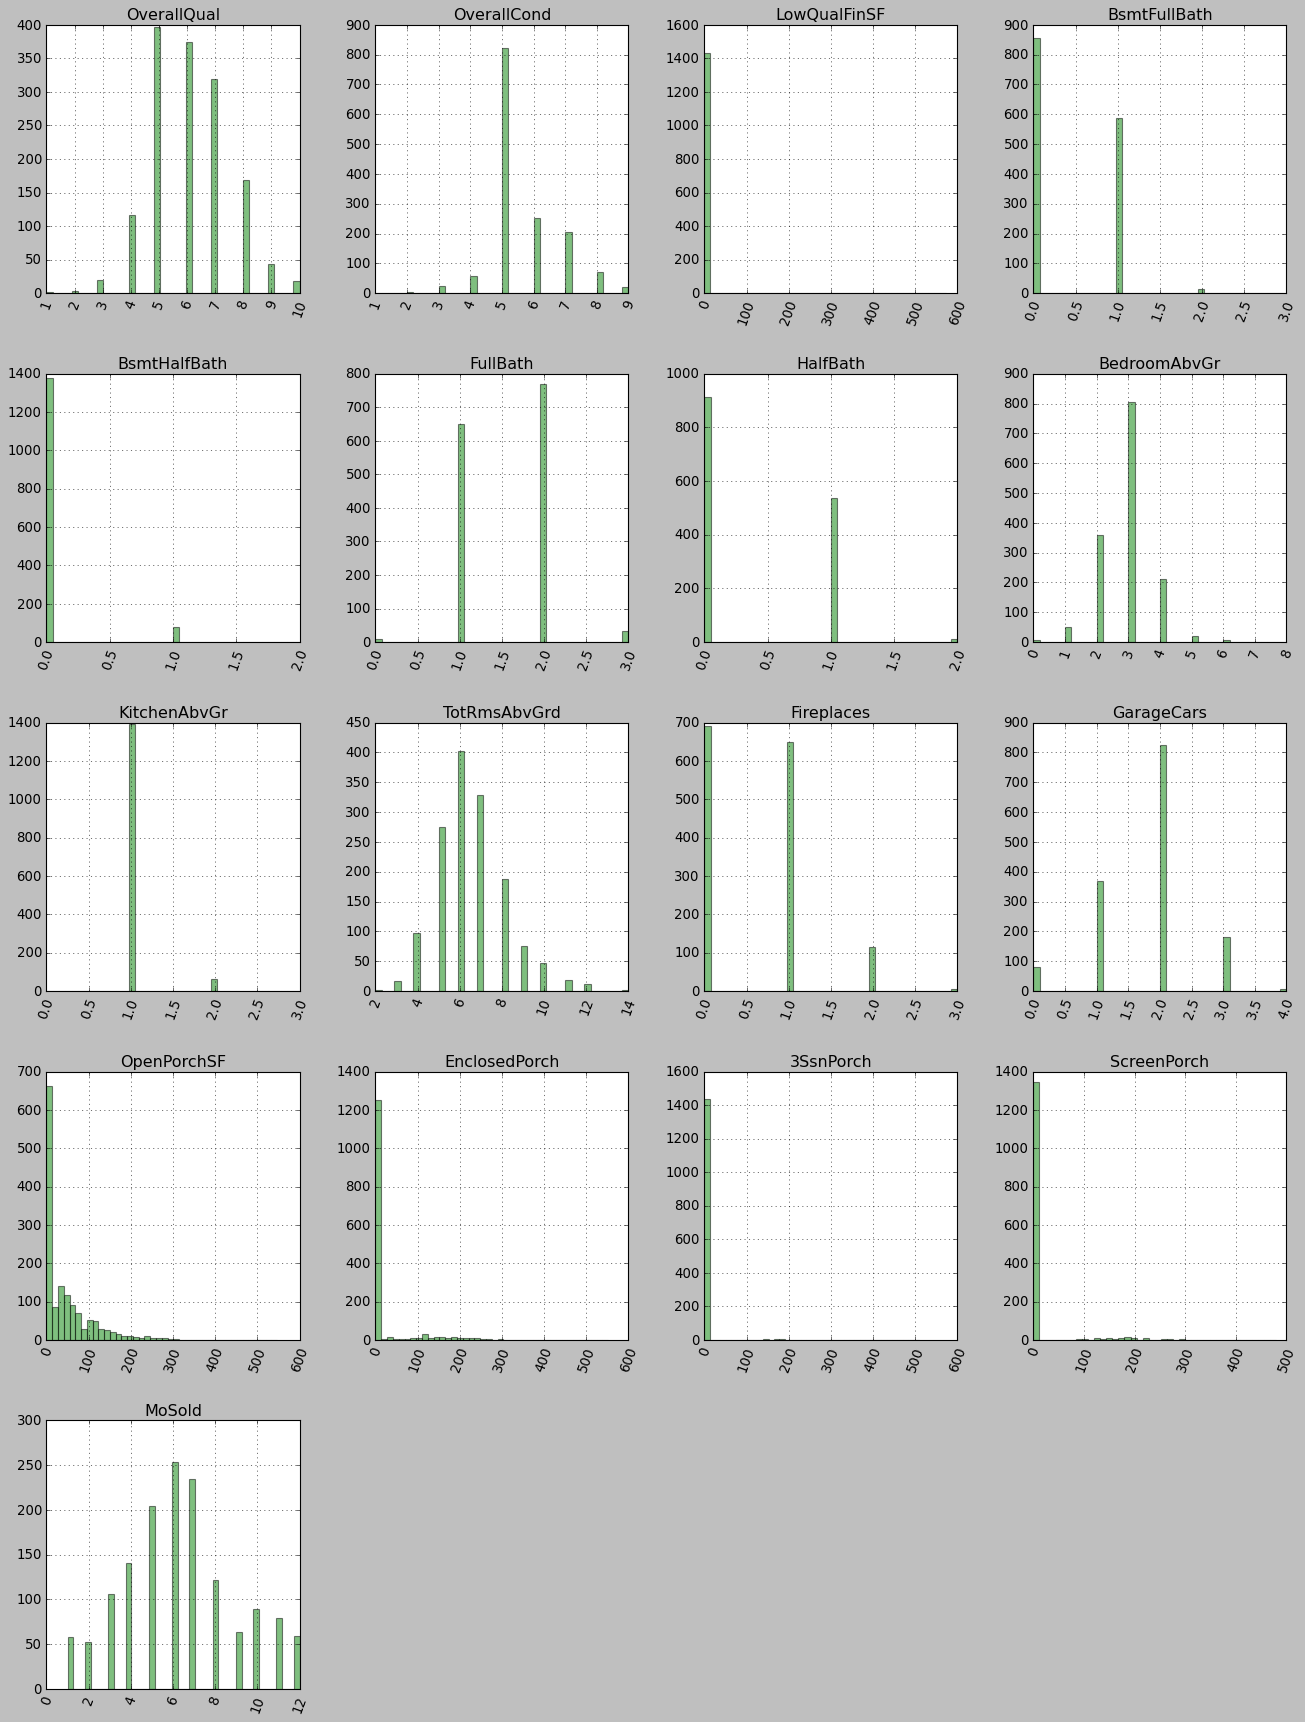

In [23]:
# plot histograms
%matplotlib inline
plt.style.use('classic')

first_phase_histograms = ["OverallQual", "OverallCond", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
 "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "OpenPorchSF", "EnclosedPorch",
 "3SsnPorch", "ScreenPorch", "MoSold"]

df_num[first_phase_histograms].hist(figsize=(20, 26), bins=40, xrot=70, color = 'green',alpha=0.5)

array([[<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'YrSold'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': 'PoolArea'}>,
        <Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'MiscVal'}>]], dtype=object)

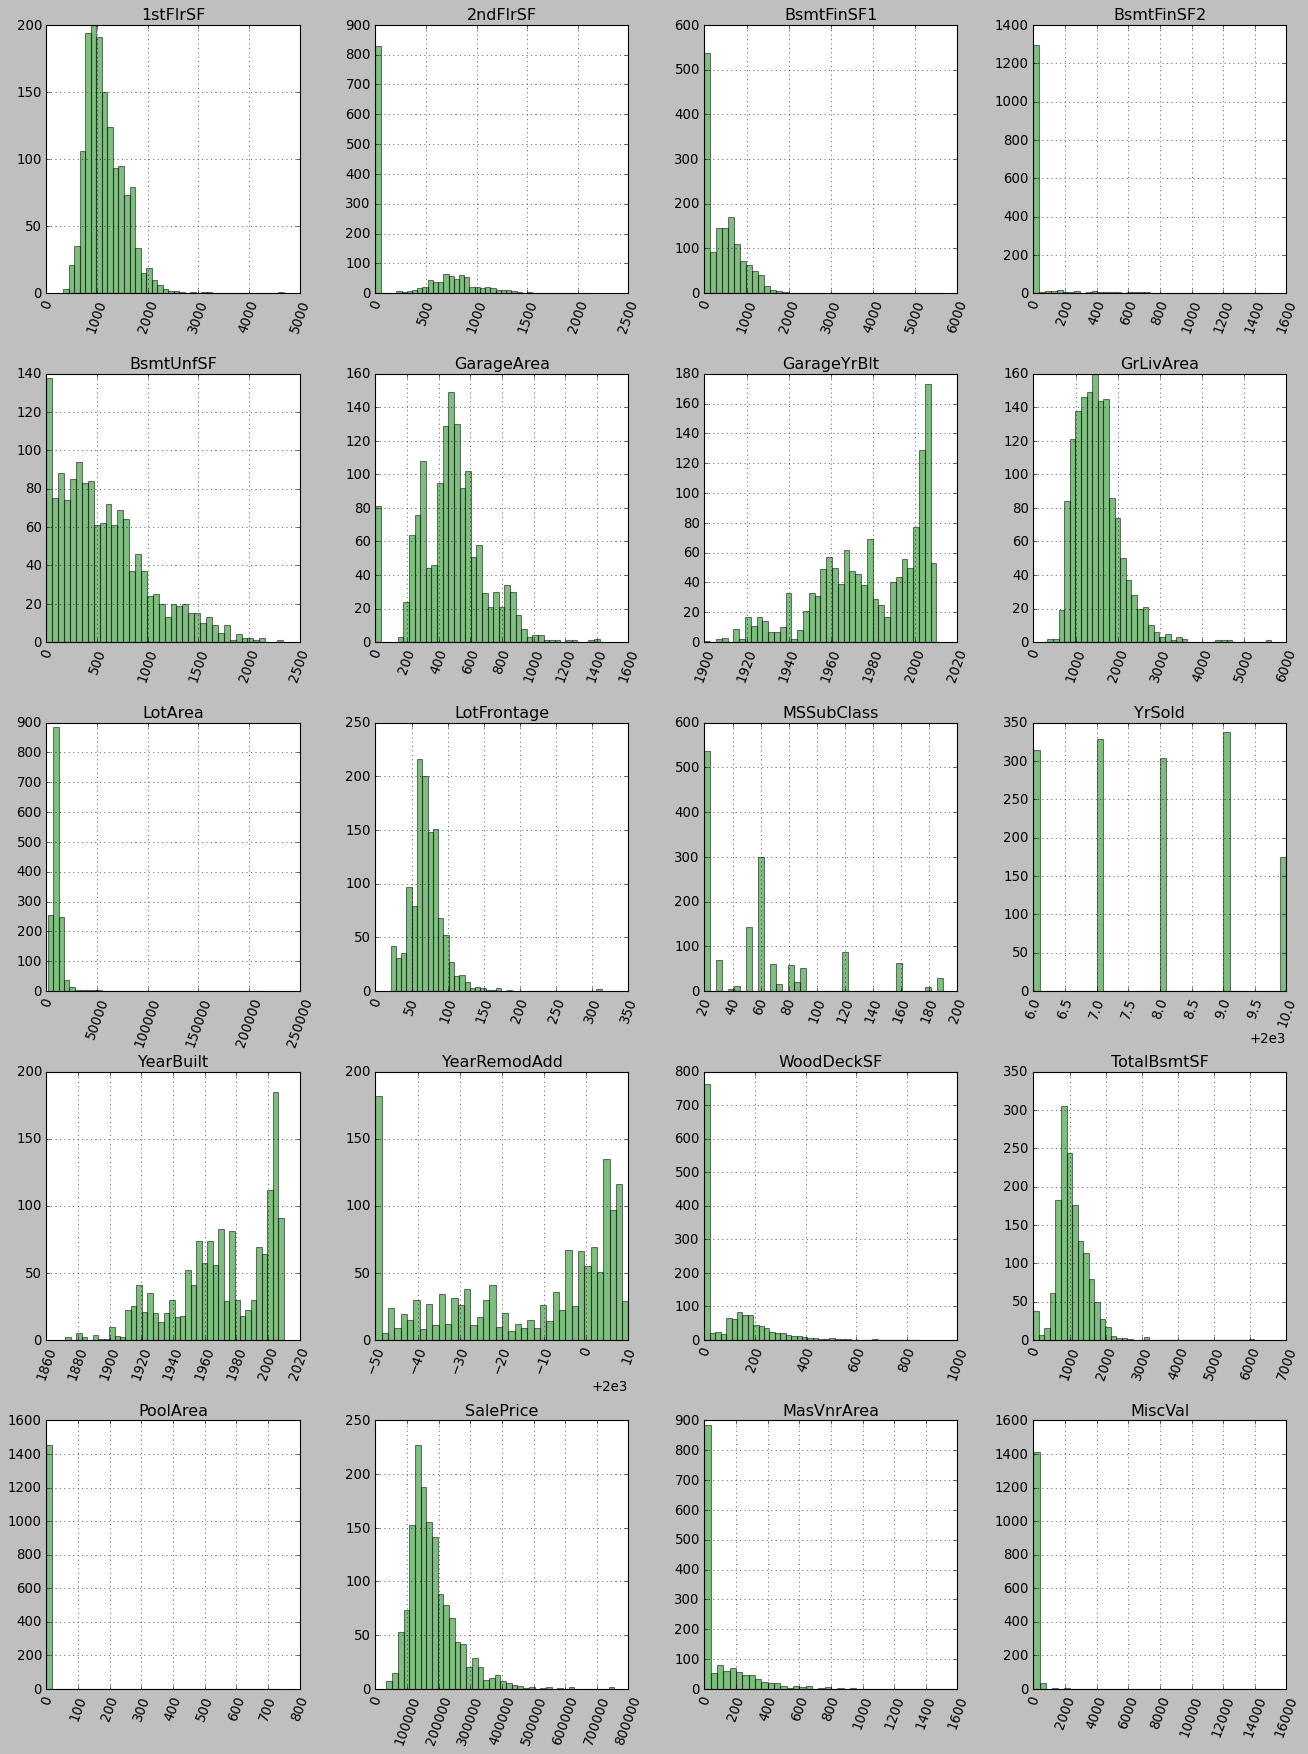

In [24]:
second_phase_histograms = ["1stFlrSF", "2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "GarageArea", "GarageYrBlt", "GrLivArea", "LotArea", "LotFrontage", "MSSubClass", "YrSold", "YearBuilt", "YearRemodAdd", "WoodDeckSF", "TotalBsmtSF", "PoolArea", "SalePrice", "MasVnrArea", "MiscVal"]
df_num[second_phase_histograms].hist(figsize=(20, 26), bins=40, xrot=70, color = 'green',alpha=0.5)

## Findings

1. Variables like *"MoSold", "OverallQual", "TotRmsAbvGrd"* looks more like **Gaussian Variables**. Variable description is given as below.

* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

2. Features such as "1stFlrSF", "TotalBsmtSF", "LotFrontage", "GrLiveArea" seems to share a similar distribution to the one we have with "SalePrice". <b>This is a Key Indication that they can help in Modelling</b>. Variable description is given as below. 

* 1stFlrSF: First Floor square feet

* TotalBsmtSF: Total square feet of basement area

* LotFrontage: Linear feet of street connected to property

* GrLivArea: Above grade (ground) living area square feet

* SalePrice: It is the SalePrice of the house.

3. <b>Applying Numerical Transformations like **Log Transformations** might help in improving the performance of the model as many variables don't obey the Gaussian Distribution.</b>

## Scatter Plots: find the relationship of 2-variables
<p>Scatter Plot comes under the Bivariate analysis. It shows the relationship between the variables. We will be plotting the scatter plot between the input variables and the target variable "SalePrice" which is to be predicted. We won't be plotting the scatter plot for the following input numerical variables 'MiscVal', 'MoSold', 'YrSold' where </p>

* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold (MM)
* YrSold: Year Sold (YYYY)

In [25]:
numeric_columns = ["OverallQual", "OverallCond", "LowQualFinSF", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
 "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "OpenPorchSF", "EnclosedPorch",
 "3SsnPorch", "ScreenPorch", "1stFlrSF", "2ndFlrSF", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "GarageArea", "GarageYrBlt",
  "GrLivArea", "LotArea", "LotFrontage", "MSSubClass", "YearBuilt", "YearRemodAdd", "WoodDeckSF", "TotalBsmtSF", "PoolArea", "MasVnrArea"]

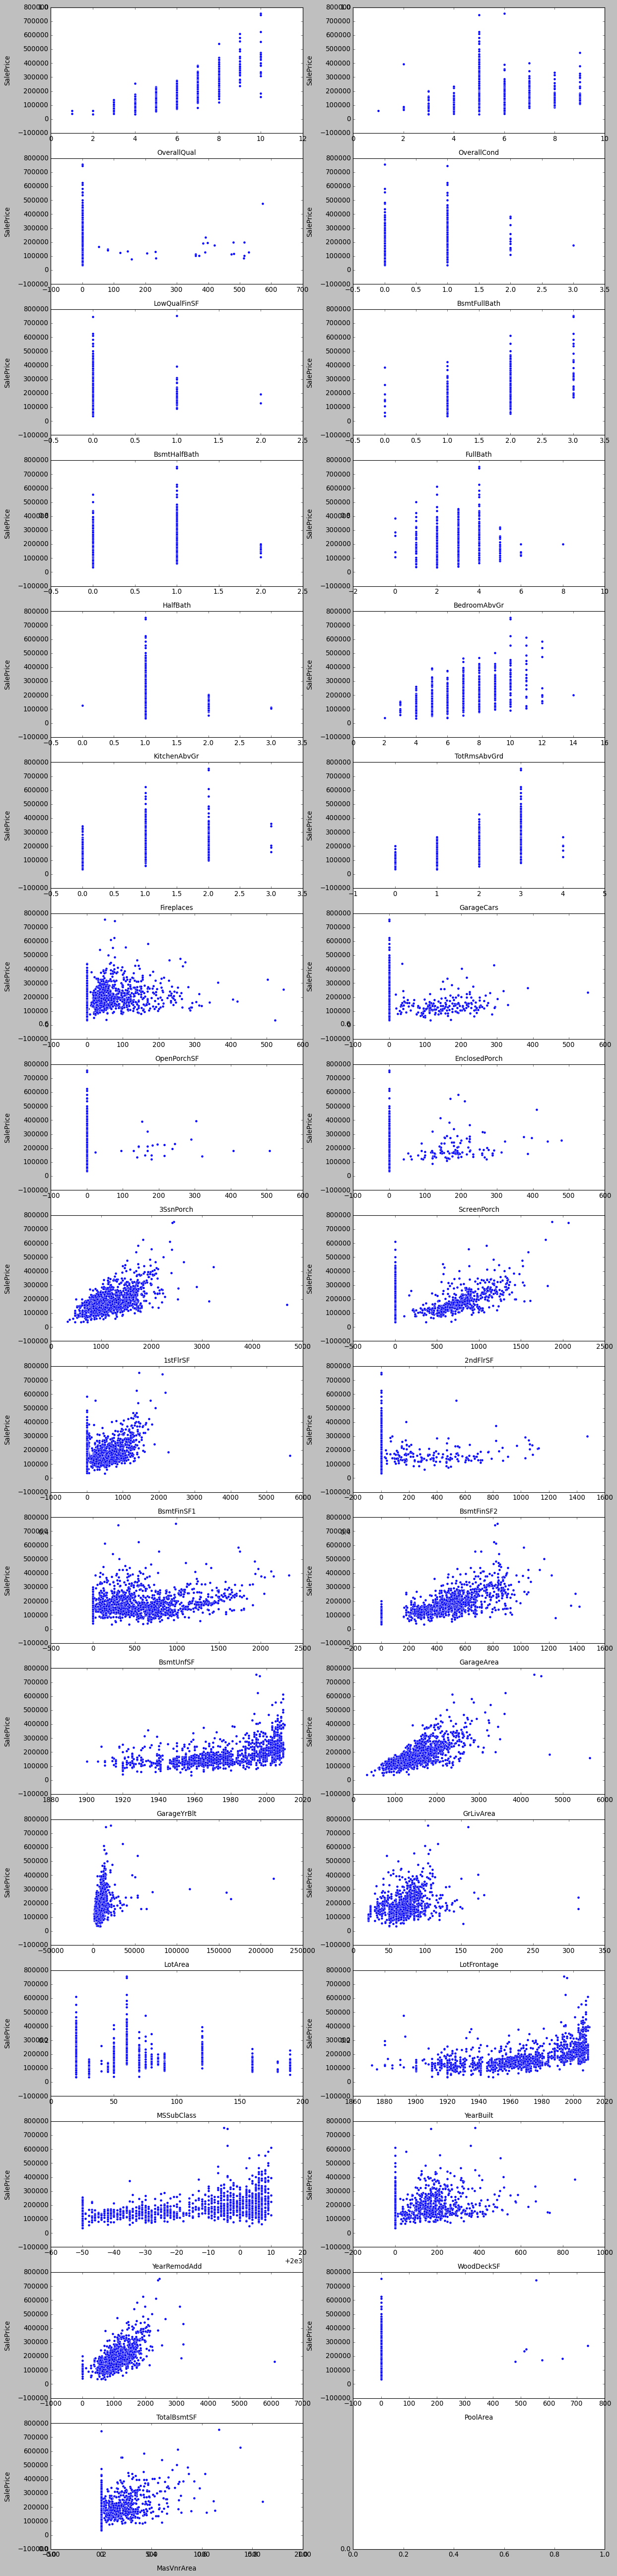

In [40]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18, 80))
for i, feature in enumerate(list(df_num[numeric_columns]), 1):
    plt.subplot(17, 2, i)
    sns.scatterplot(x=feature, y='SalePrice', data=df_num)
    plt.xlabel('{}'.format(feature), size=12,labelpad=12.5)
    plt.ylabel('SalePrice', size=12, labelpad=12.5)
plt.show()

## Findings

1. We can see that a lot of data points are located on x = 0 which may indicate the absence of such feature in the house. For example LowQualFinSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, 2ndFlrSF, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, GarageArea, WoodDeckSF, TotalBsmtSF, PoolArea and MasVnrArea. All are having some data points located on x=0, indicating missing values in the respective columns. Below are the description of the Variables for a given house.

* LowQualFinSF: Low quality finished square feet (all floors)
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* 2ndFlrSF: Second floor square feet
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* GarageArea: Size of garage in square feet
* WoodDeckSF: Wood deck area in square feet
* TotalBsmtSF: Total square feet of basement area
* PoolArea: Pool area in square feet
* MasVnrArea: Masonry veneer area in square feet

2. The scatter plot between "TotalBsmtSF" and "SalePrice" seems to have a Linear relationship, which would be helpful in modelling. 

3. The scatter plot between "GrLivArea" and "SalePrice" seems to have a Linear relationship, which would be helpful in modelling. 

* GrLivArea: GrLivArea: Above grade (ground) living area square feet

4. The scatter plot between "MasVnrArea" and "SalePrice" seems to have a Linear relationship, which would be helpful in modelling. 

5. 1ndFlrSF and 2ndFlrSF seems to have a Linear Relationship with the "SalePrice". 

6. There are some outliers in GrLivArea(Above grade (ground) living area square feet). Some houses with Large GrLivArea tend to have low prices. 

## Correlation Measure with Target

In [41]:
result = df_num.drop("SalePrice", axis=1).apply(lambda x: x.corr(df_num.SalePrice, "pearson"))
result = result.sort_values(kind="quicksort", ascending=False)
print(result)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64


## Findings

1. We can see the top correlated variables with the "SalePrice" which have a strong correlation. 

2. These variables include, "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "FullBath" and so on.

* OverallQual: Rates the overall material and finish of the house
* GrLivArea: Above grade (ground) living area square feet
* GarageCars: Size of garage in car capacity
* FullBath: Full bathrooms above grade

3. These Features are the possible candidates of including as a feature for modelling. 

4. The number of Cars that fit into the garage is a consequence of the Garage Area. 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. This is a case of Multicollinearity. So one of the feature should be chosen, we will go with GarageCars as that is most correlated with the Saleprice. 


## Categorical Variable Analysis

## BotPlot

In [44]:
# Function responsible for plotting the BoxPlot
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

# Replacing the Missing Values in the Categorical Variables with the "MISSING" string
def fillMissingCatColumns(data,categorical):
    for c in categorical:
        data[c] = data[c].astype('category')
        if data[c].isnull().any():
            data[c] = data[c].cat.add_categories(['MISSING'])
            data[c] = data[c].fillna('MISSING')

# Main function responsible for plotting the BoxPlots
def getboxPlots(data, var, categorical):
    fillMissingCatColumns(data, categorical)
    f = pd.melt(data, id_vars=var, value_vars=categorical)
    g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
    g = g.map(boxplot, "value", var)

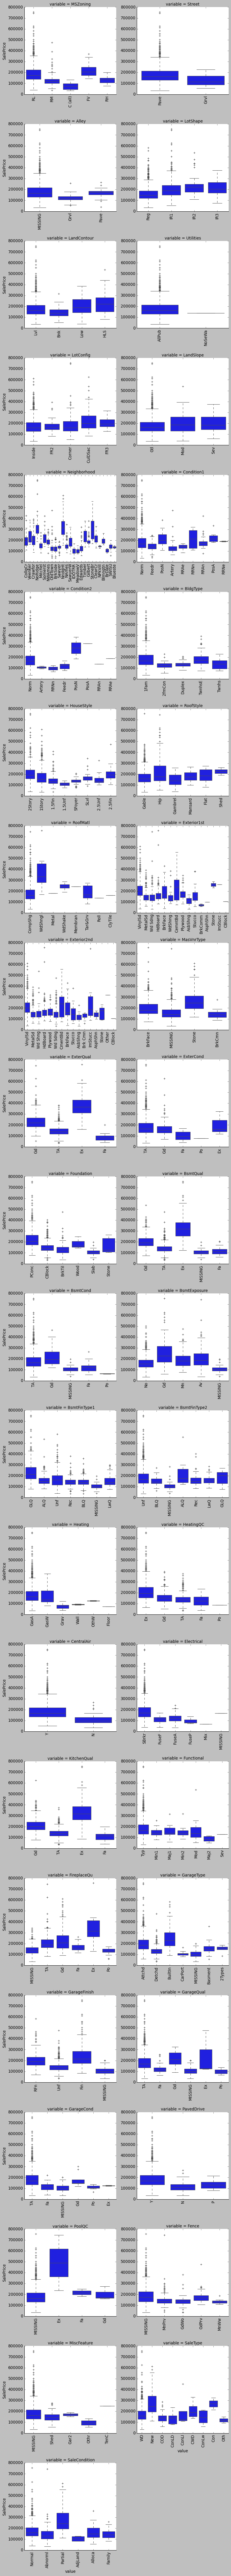

In [43]:
categorical = [f for f in train.columns if train.dtypes[f] == 'object']   
train_copy = train.copy(True) 
getboxPlots(train_copy, 'SalePrice', categorical)

## Findings

1. Street, which is the type of road access to the the property, with Pave tend to have more price.
2. ExterQual (exterior quality of the house) with excellent condition has more price. Same holds for BsmtQual, KichenQual, GarageQual and PoolQC.  
3. Houses with Central Air conditioning (CentralAir) has more price. 
4. Houses having PavedDrive are having more price.
5. Houses with Foundation of Poured Contrete has more price.

## Numerical Feature Transformations

<p>As we noticed from above Histograms that most of the Numerical Features do not obey the Gaussian Distribution so transforming the Numerical Variables might give us the boost in the performace of the models. Transformation will happen in the following steps</p>

1. We will be calculating the Skewness of Numberical Variables（分布情况，右偏大于零，左偏小于零，正态为零）on the Training Dataset (train.csv). We will compute the Skewness of a column after dropping the missing values in it. 

2. We will filter out the Numerical Variables having Skewness greater than some threshhold say 0.75.

3. We will apply Log Transformation on all Numerical Variables in both the train and test files which are having the skewness greater than threshold.

In [45]:
# First we will combine the train and the test csv files
# We will be including all the rows from the files and columns from MSSubClass till SaleCondition
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [46]:
all_data.shape

(2919, 79)

In [48]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [49]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index # Getting the Numerical Features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) # Computing the Skewness of Columns

In [50]:
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [51]:
skewed_feats

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
dtype: float64

In [52]:
skewed_feats = skewed_feats[skewed_feats > 0.75] # Keeping only those having skewness greater than 0.75
skewed_feats = skewed_feats.index # Getting the columns in a separate list
skewed_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [53]:
all_data[skewed_feats] = np.log1p(all_data[skewed_feats]) #Applying the log transformation on the Chosen Numerical Features
all_data.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal


对数变换是一种常用的数据变换方法，用于调整数据的分布形态。它将数据的原始值取对数，从而使数据的分布更接近于正态分布。对数变换通常采用自然对数（以 e 为底）或者常用对数（以 10 为底）。

对数变换的作用包括：

1. **减小数据的偏度**：对数变换可以将数据从右偏斜（正偏态）或左偏斜（负偏态）的分布转换为更接近于对称分布的形态。这有助于改善数据的正态性，使得统计推断更加准确。

2. **减小数据的方差**：对数变换可以减小数据的方差，特别是对于偏度较大的数据。这有助于降低数据的离群值影响，使得建模过程更加稳定。

3. **线性化关系**：对数变换可以将非线性关系转换为线性关系，这有助于线性建模技术的应用。例如，在回归分析中，对数变换可以使得自变量和因变量之间的关系更加线性。

需要注意的是，对数变换并不适用于所有情况，特别是当数据中存在零值或负值时。此外，对数变换会改变数据的原始单位和尺度，因此在使用前需要仔细考虑是否符合实际情况和建模需求。

## Categorical Variable Encoding

one-hot-encoder

In [54]:
all_data = pd.get_dummies(all_data) # It automatically transforms the Categorical Variables

In [55]:
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,False,False,False,True,False,False,False,False,True,False
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,False,False,False,True,False,False,False,False,True,False
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,False,False,False,True,True,False,False,False,False,False
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,False,False,False,True,False,False,False,False,True,False


## Dealing with Missing Values

In [58]:
all_data["LotFrontage"].isnull().mean()

0.16649537512846865

In [56]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(all_data)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:20]

Percent of missing data


[('LotFrontage', 16.65),
 ('GarageYrBlt', 5.45),
 ('MasVnrArea', 0.79),
 ('BsmtFullBath', 0.07),
 ('BsmtHalfBath', 0.07),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.03),
 ('BsmtUnfSF', 0.03),
 ('TotalBsmtSF', 0.03),
 ('GarageCars', 0.03),
 ('GarageArea', 0.03),
 ('MSSubClass', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0)]

## Mean Imputation

In [59]:
all_data = all_data.fillna(all_data.mean())

In [60]:
missing = percent_missing(all_data)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:20]

Percent of missing data


[('MSSubClass', 0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0)]

## Modeling

In [61]:
# train test split
# creating matrices for sklearn:
X_train = all_data[:train.shape[0]] # Retrieving the rows for train from the all_data
X_test = all_data[train.shape[0]:] # Retrieving the rows for test from the all_data
y_train = train.SalePrice # Retrieving the output variable "SalePrice" of the train dataset 

In [62]:
X_train.shape, X_test.shape

((1460, 287), (1459, 287))

In [63]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,False,False,False,True,False,False,False,False,True,False
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,False,False,False,True,False,False,False,False,True,False
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,False,False,False,True,False,False,False,False,True,False
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,False,False,False,True,True,False,False,False,False,False
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,False,False,False,True,False,False,False,False,True,False


## Dummy Regressor Baseline

In [64]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, y_train)

DummyRegressor()

In [65]:
y_pred = dummy_reg.predict(X_train)

In [66]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
dummy_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(dummy_rmse)

79415.29188606751


## Multiple Linear Regression

In [67]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = linear_reg.predict(X_train)

In [69]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
linear_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(linear_rmse)

22109.03048701136


## Ridge Regression

In [70]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [71]:
y_pred = ridge_reg.predict(X_train)

In [72]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
ridge_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(ridge_rmse)

22739.986377407313


## Lasso Regression

In [73]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.5,max_iter=10000)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.5, max_iter=10000)

In [74]:
y_pred = lasso_reg.predict(X_train)

In [75]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
lasso_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(lasso_rmse)

22234.556229853722


## Elastic Net Regression

In [76]:
from sklearn import linear_model
elastic_net_reg = linear_model.ElasticNet(l1_ratio=0.5)
elastic_net_reg.fit(X_train, y_train)

ElasticNet()

In [77]:
y_pred = elastic_net_reg.predict(X_train)

In [78]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
elastic_net_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(elastic_net_rmse)

35073.109259178455


## Support Vector Regression

In [79]:
from sklearn.svm import SVR
svr_reg =  SVR(kernel="linear")
svr_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [80]:
y_pred = svr_reg.predict(X_train)

In [81]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
svr_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(svr_rmse)

55878.13558762915


## Nearest Neighbours Regression

In [82]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg =  KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [83]:
y_pred = knn_reg.predict(X_train)

In [84]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
svr_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(svr_rmse)

41751.453892467616


## Decision Tree Regression

In [85]:
from sklearn import tree
tree_reg =  tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [86]:
y_pred = tree_reg.predict(X_train)

In [87]:
# Computing the Root Mean Squared Error 
from sklearn.metrics import mean_squared_error
from math import sqrt
tree_rmse = sqrt(mean_squared_error(y_train, y_pred))
print(tree_rmse)

0.0


## Submission of Results to Kaggle

In [88]:
# the submission file provided by the Kaggle 
sample_submission = pd.read_csv("datas/house-pricing-dataset/sample_submission.csv")
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [98]:
# Function to create the Download link to the Submissions
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [100]:
# Generating the Submission File Using Dummy Regression
sample_submission_dummy = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_dummy["SalePrice"] = dummy_reg.predict(X_test)
create_download_link(sample_submission_dummy, title="Download Dummy Regressor Submission", filename="sample_submission_dummy.csv")

In [101]:
# Generating the Submission File Using Linear Regression
sample_submission_linear = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_linear["SalePrice"] = linear_reg.predict(X_test)
create_download_link(sample_submission_linear, title="Download Linear Regression Submission", filename="sample_submission_linear.csv")

In [102]:
# Generating the Submission File Using Ridge Regression
sample_submission_ridge = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_ridge["SalePrice"] = ridge_reg.predict(X_test)
create_download_link(sample_submission_ridge, title="Download Ridge Regression Submission", filename="sample_submission_ridge.csv")

In [103]:
# Generating the Submission File Using Lasso Regression
sample_submission_lasso = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_lasso["SalePrice"] = lasso_reg.predict(X_test)
create_download_link(sample_submission_lasso, title="Download Lasso Regression Submission", filename="sample_submission_lasso.csv")

In [104]:
# Generating the Submission File Using Elastic Net Regression
sample_submission_elastic_net = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_elastic_net["SalePrice"] = elastic_net_reg.predict(X_test)
create_download_link(sample_submission_elastic_net, title="Download Elastic Net Regression Submission", filename="sample_submission_elastic_net.csv")

In [105]:
# Generating the Submission File Using Support Vector Regression
sample_submission_svr = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_svr["SalePrice"] = svr_reg.predict(X_test)
create_download_link(sample_submission_svr, title="Download Support Vector Regression Submission", filename="sample_submission_svr.csv")

In [106]:
# Generating the Submission File Using KNN
sample_submission_knn = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_knn["SalePrice"] = knn_reg.predict(X_test)
create_download_link(sample_submission_knn, title="Download KNN Regression Submission", filename="sample_submission_knn.csv")

In [107]:
# Generating the Submission File Using Decision Tree Regression
sample_submission_tree = sample_submission.copy(True)  # Making a Deep Copy of the file
sample_submission_tree["SalePrice"] = tree_reg.predict(X_test)
create_download_link(sample_submission_tree, title="Download Decision Tree Regression Submission", filename="sample_submission_tree.csv")

## Submission and conclusion

Submission of above files on Kaggle gave us the following results on Public Leaderboard.
1. Dummy Regressor (0.42577)
2. Multiple Linear Regressor (0.55048)
3. Ridge Regressor (0.20693)
4. Lasso Regressor (0.24409)
5. ElasticNet Regressor (0.18450)
6. Support Vector Regressor (0.26048)
7. K-Nearest Neighbour Regressor (0.25936)
8. Decision Tree Regressor (0.20245)


Conclusion

We can see that the ElasticNet Regressor gives us the best results on the test dataset then all the other models. Decision Tree Regressor which tend to have a error of zero on the training dataset, doesn't performs that much good on the test dataset. This situation is called Overfitting. 

## Try other things

1. Trying out the Feature Selection Techniques like Recursive Feature Elimination can surely boost the performance.

2. Features pointed out in the Exploratory Data Analysis part of the code above (Numerical and Categorical Variables analysis) can surely boost the performance. If used as pointed above.

3. Feature Importance can be calculated using the Scikit Learn's library using each model.

4. for the models above:

    1. We can do the process of cross validation as we saw in the lessons and report the average performace (error) of the models across different splits. We will be looking into the working of it in the chapter of Classification. 

    2. We can do a search on the hyperparameters like $\alpha$ for Linear, Ridge, Lasso Regressions. These advance searches include RandomSearch and GridSearch. We will be looking into the detail of their working in the chapter of Classification and how they can be used to find the optimal parameters for the respective models. 